In [2]:
#Wiki updates Deaths_in_2020 and then transfer is to months

import urllib.request
import matplotlib.pyplot as plt 
from bs4 import BeautifulSoup
from datetime import date
from notable import *

In [22]:
#This part is still valid for may
url = 'https://en.wikipedia.org/wiki/Deaths_in_2020'
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")
body = soup.findAll('div', {"class": "mw-parser-output"})

ddate = [2020,'May',0]

xdate = []
ydeaths = []
ycovid = []

for row in body[0].findAll(['h3','ul'])[9:]:
    
    if row.name == 'h3':
        #print(row)
        ddate[2] = row.text
        #print(ddate)
        xdate += [to_date(ddate)]
    
    elif row.name == 'ul':
        tot = 0
        cov = 0
        for person in row.findAll('li'):
            tot += 1
            if "COVID" in person.text:
                cov += 1
        ydeaths += [tot]
        ycovid += [cov]
        
        if ddate == [2020,'May','1']:
            break

Text(0, 0.5, '% Covid-19 Deaths')

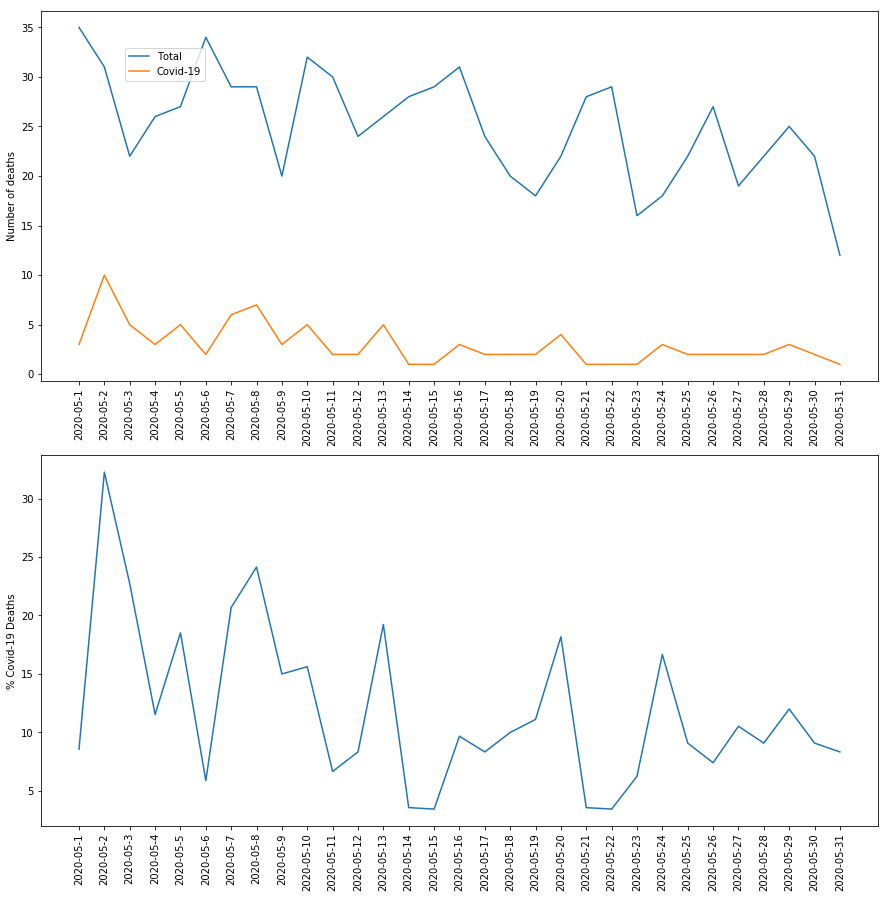

In [23]:
plt.figure(figsize=(15,15))
plt.subplot(2, 1, 1)
plt.plot(xdate[::-1], ydeaths[::-1], label='Total')
plt.plot(xdate[::-1], ycovid[::-1],label='Covid-19')
plt.xticks(rotation='vertical')
plt.ylabel('Number of deaths')
plt.legend(bbox_to_anchor=(0.1,0.9), loc='upper left', borderaxespad=0.)

plt.subplot(2, 1, 2)
plt.plot(xdate[::-1], [ycovid[i]/ydeaths[i]*100 for i in range(len(xdate))][::-1] )
plt.xticks(rotation='vertical')
plt.ylabel('% Covid-19 Deaths')

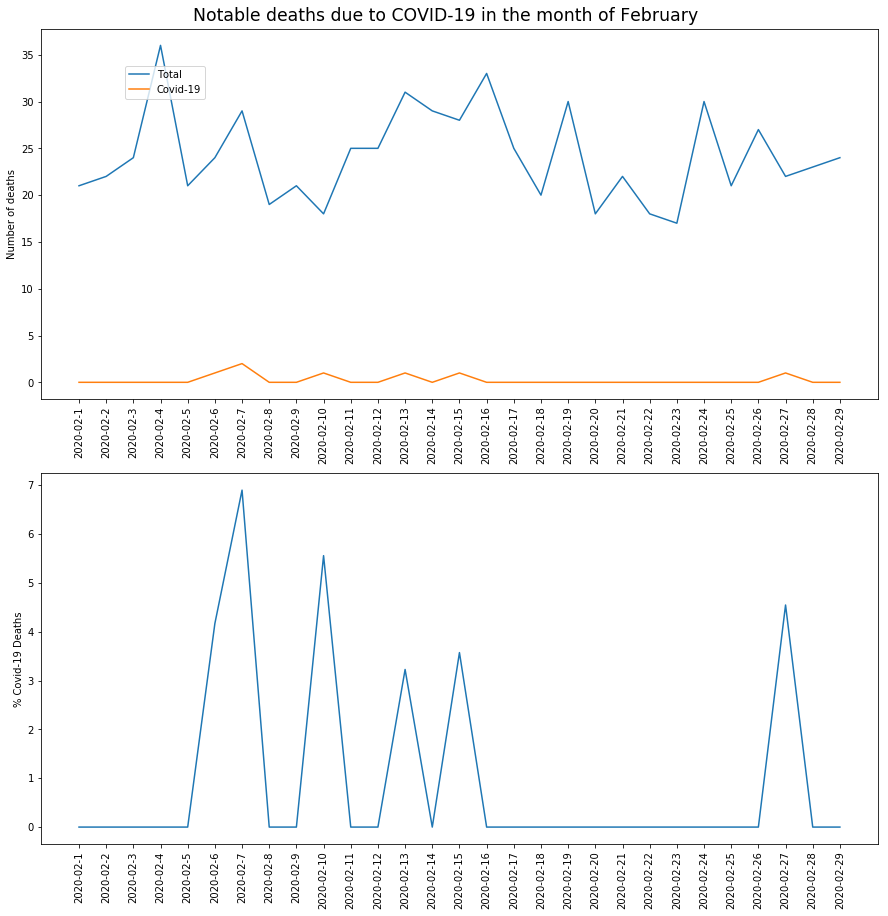

In [5]:
february = DeathsByMonth('February')
february.plot_summary()

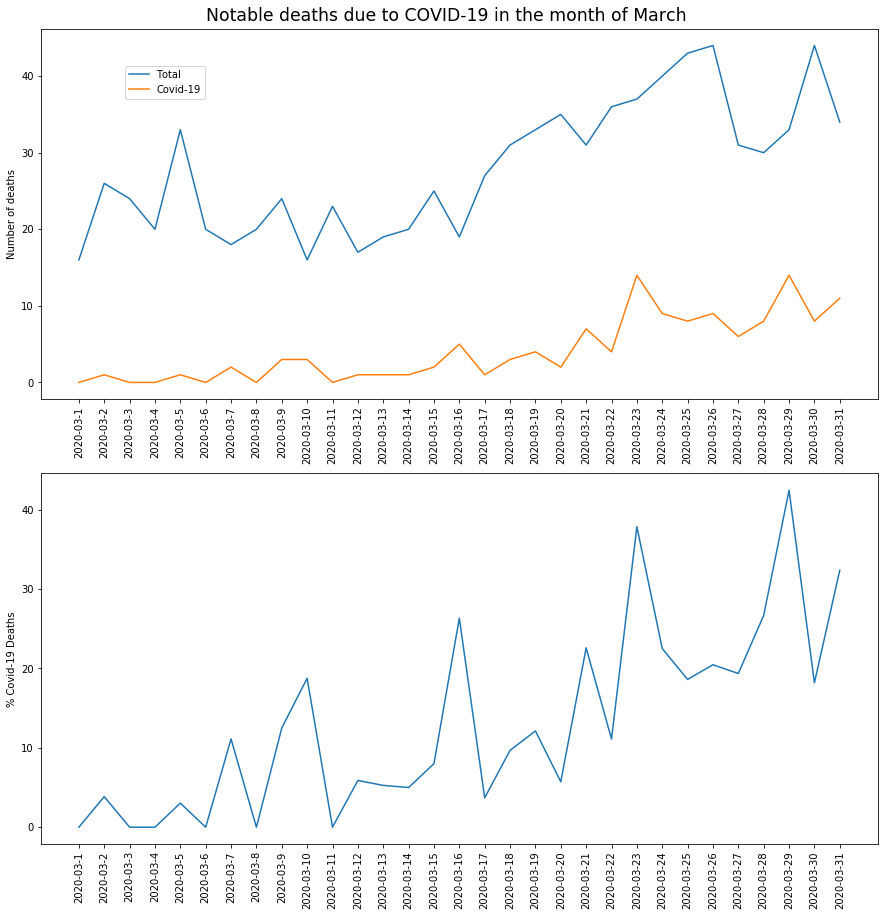

In [6]:
march = DeathsByMonth('March')
march.plot_summary(save=True)

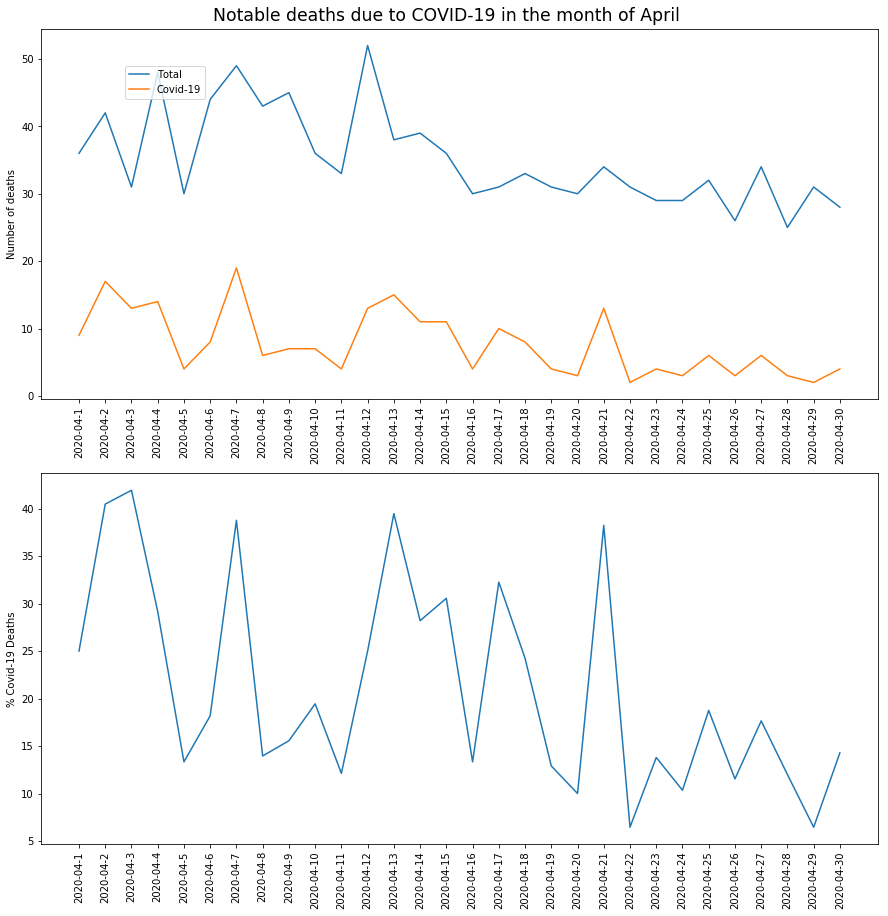

In [7]:
april = DeathsByMonth('April')
april.plot_summary(save=True)

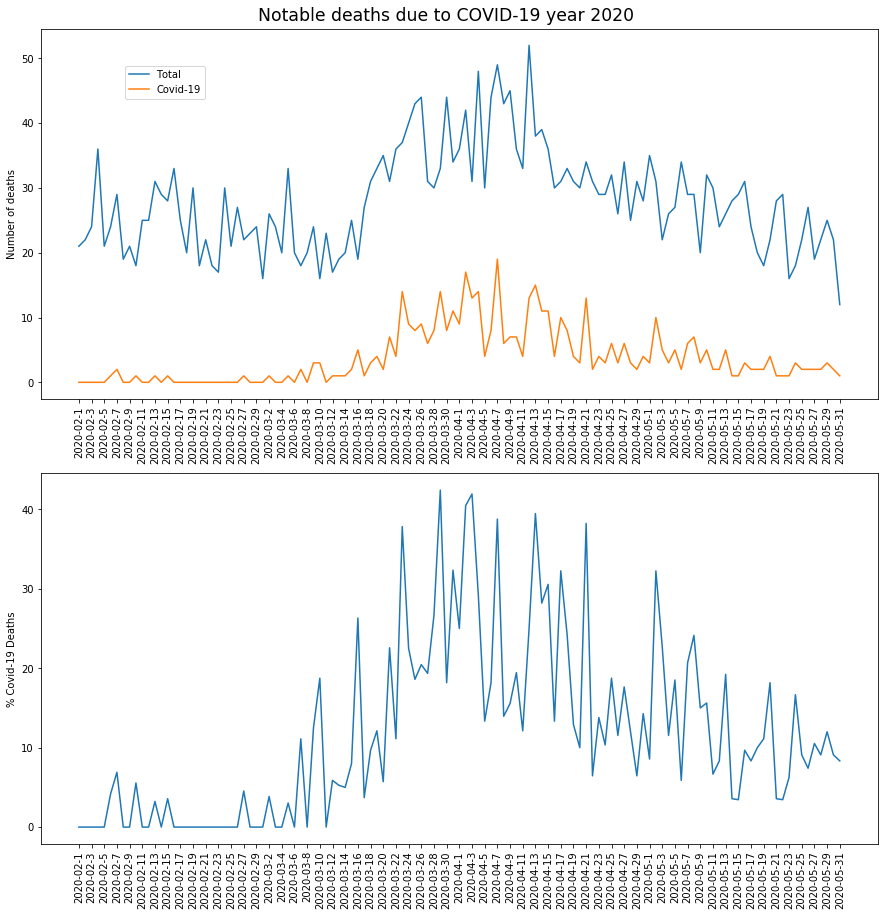

In [24]:
xall = february.xdate+march.xdate+april.xdate+xdate[::-1]
ydall = february.ydeaths+march.ydeaths+april.ydeaths+ydeaths[::-1]
ycoall = february.ycovid+march.ycovid+april.ycovid+ycovid[::-1]

plt.figure(figsize=(15,15))
plt.subplot(2, 1, 1)
plt.plot(xall, ydall, label='Total')
plt.plot(xall, ycoall,label='Covid-19')
plt.xticks([xall[i] for i in range(len(xall)) if i%2==0],rotation='vertical')
plt.ylabel('Number of deaths')
plt.legend(bbox_to_anchor=(0.1,0.9), loc='upper left', borderaxespad=0.)

plt.subplot(2, 1, 2)
plt.plot(xall, [ycoall[i]/ydall[i]*100 for i in range(len(xall))] )
plt.xticks([xall[i] for i in range(len(xall)) if i%2==0],rotation='vertical')
plt.ylabel('% Covid-19 Deaths')
plt.suptitle('Notable deaths due to COVID-19 year 2020', y=0.90, fontsize = 'xx-large')

plt.savefig('plots_notable/notable'+str(date.today()))

In [ ]:
#AFTER THIS POINT IS OLD STUFF

In [78]:
def mton (month):
    mton_d = {'January':'01','February':'02','March':'03','April':'04','May':'05','June':'06'
     ,'July':'07','August':'08','September':'09','October':'10','November':'11','December':'12'}
    return(mton_d[month])

def to_date (d):
    return(str(d[0])+'-'+mton(d[1])+'-'+str(d[2]))

def days_in (month):
    days_d = {'January':'31','February':'29','March':'31','April':'30','May':'31','June':'30'
     ,'July':'31','August':'31','September':'30','October':'31','November':'30','December':'31'}
    return(days_d[month])

class DeathsByMonth:
    def __init__(self, month):
        self.month = month
        self.url = 'https://en.wikipedia.org/wiki/Deaths_in_' + month + '_2020'
        self.page = urllib.request.urlopen(self.url)
        self.soup = BeautifulSoup(self.page, "lxml")
        self.body = self.soup.find('div',{'id': 'mw-content-text'})
        self.xdate = []
        self.ydeaths = []
        self.ycovid = []
        
        date = [2020,self.month,0]
        for row in self.body.findAll(['h3','ul'])[2:]:
            if row.name == 'h3':
                date[2] = row.text[:-6]
                self.xdate += [to_date(date)]
            elif row.name == 'ul':
                tot = 0
                cov = 0
                for person in row.findAll('li'):
                    tot += 1
                    if "COVID" in person.text:
                        cov += 1
                self.ydeaths += [tot]
                self.ycovid += [cov]
                if date == [2020,self.month,days_in(self.month)]:
                    break
    def plot_summary(self):
        plt.figure(figsize=(15,15))
        plt.subplot(2, 1, 1)
        plt.plot(self.xdate, self.ydeaths, label='Total')
        plt.plot(self.xdate, self.ycovid, label='Covid-19')
        plt.xticks(rotation='vertical')
        plt.ylabel('Number of deaths')
        plt.legend(bbox_to_anchor=(0.1,0.9), loc='upper left', borderaxespad=0.)
        plt.subplot(2, 1, 2)
        plt.plot(self.xdate, [self.ycovid[i]/self.ydeaths[i]*100 for i in range(len(self.xdate))] )
        plt.xticks(rotation='vertical')
        plt.ylabel('% Covid-19 Deaths')

In [16]:
print(len(february.xdate),len(march.xdate),len(april.xdate))
print(len(february.ycovid),len(march.ycovid),len(april.ycovid))
print(len(february.ydeaths),len(march.ydeaths),len(april.ydeaths))

29 31 30
29 31 30
29 31 30


In [21]:
body[0].findAll(['h3','ul'])[9:]

[<h3><span class="mw-headline" id="31">31</span></h3>,
 <ul><li><a href="/wiki/Bob_Bennett_(baseball)" title="Bob Bennett (baseball)">Bob Bennett</a>, 86, American <a href="/wiki/National_College_Baseball_Hall_of_Fame" title="National College Baseball Hall of Fame">Hall of Fame</a> college baseball coach (<a href="/wiki/Fresno_State_Bulldogs_baseball" title="Fresno State Bulldogs baseball">Fresno State</a>).<sup class="reference" id="cite_ref-27"><a href="#cite_note-27">[27]</a></sup></li>
 <li><a class="mw-redirect" href="/wiki/Christo" title="Christo">Christo</a>, 84, Bulgarian-born American artist (<i><a href="/wiki/Running_Fence" title="Running Fence">Running Fence</a></i>).<sup class="reference" id="cite_ref-28"><a href="#cite_note-28">[28]</a></sup></li>
 <li><a class="new" href="/w/index.php?title=David_Hales&amp;action=edit&amp;redlink=1" title="David Hales (page does not exist)">David Hales</a>, British pianist (<a href="/wiki/Cairo_Conservatoire" title="Cairo Conservatoire">C